<a href="https://colab.research.google.com/github/VeePollux/Calculo_Numerico_Computacional/blob/main/Relat%C3%B3rio3_VanessaAldrighi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório 3

##Imports

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
from sympy.plotting.plot import PlotGrid
import scipy
from scipy.interpolate import CubicSpline

##Métodos

###Lagrange


In [ ]:
def polinomioLagrange (m, x, y, z):
  Pz = 0
  Polinomio = ""
  Numerador = ""
  for i in range(0, m):
    Numerador = f"(({y[i]} * "
    c = 1
    d = 1
    for j in range(0, m):
      if(i != j):
        c = c*(z -x[j])
        d = d*(x[i]-x[j])
        Numerador += f"(x - {x[j]})*"
    Pz = Pz + y[i] * (c/d)
    Numerador = Numerador[:-3]
    Polinomio += Numerador + f")"
    Polinomio += f"/ {d}) + "
  Polinomio = Polinomio[:-3]
  print(Polinomio)
  return Pz



In [ ]:
vetorAbscissas = np.array([3, 9, 20], float)
vetorOrdenadas = np.array([1.5, 4.5, 6], float)
Pz = polinomioLagrange(3, vetorAbscissas, vetorOrdenadas, 3)
print(Pz)

((1.5 * (x - 9.0)*(x - 20.)/ 102.0) + ((4.5 * (x - 3.0)*(x - 20.)/ -66.0) + ((6.0 * (x - 3.0)*(x - 9.)/ 187.0)
1.5


###Newton

In [ ]:
def formaNewton(m, x, y, z):
  Dely = np.zeros(m)
  Polinomio = ""
  for i in range(0, m):
    Dely[i] = y[i]
  Polinomio +=f"{Dely[0]}"
  for i in range(1, m):
    for k in range(m, i , -1):
      Dely[k-1] = (Dely[k-1] - Dely[k-1-1])/(x[k-1]-x[k-i-1])
    Polinomio +=f" + ({Dely[i]})"
    for pol in range(0, i):
      Polinomio +=f"*(x - {x[pol]})"
  Pz = Dely[m-1]
  for i in range(m-1, 0, -1):
    Pz = Pz * (z-x[i-1]) + Dely[i-1]
  print("POL", Polinomio)
  return Pz

In [ ]:
vetorAbscissas = np.array([3, 9, 20], float)
vetorOrdenadas = np.array([1.5, 4.5, 6], float)
Pz = formaNewton(3, vetorAbscissas, vetorOrdenadas, 20)
print(Pz)

POL 1.5 + (0.5)*(x - 3.0) + (-0.021390374331550804)*(x - 3.0)*(x - 9.0)
5.999999999999999


###Spline Cúbica

In [ ]:
def SplineCubica (n, x, y):
  e = np.zeros(n)
  d = np.zeros(n)
  s2 = np.zeros(n)
  m = n -2
  #Construção do sistema linear tridiagonal simétrico
  Ha = x[1] - x[0]
  Deltaa=(y[1]-y[0])/Ha
  for i in range(0, m):
    ip1 = i +1
    ip2 = i+ 2
    Hb = x[ip2]-x[ip1]
    Deltab = (y[ip2]-y[ip1])/Hb
    e[i] = Hb
    d[i]=2*(Ha+Hb)
    s2[ip1]= 6*(Deltab - Deltaa)
    Ha = Hb
    Deltaa = Deltab
  #Eliminação de Gauss
  for i in range(1, m):
    ip1 = i + 1
    im1 = i-1
    t=e[im1]/d[im1]
    d[i]=d[i]-t*e[im1]
    s2[ip1]=s2[ip1]-t*s2[i]
  #Solução por substituições retroativas
  s2[m]=s2[m]/d[m-1]
  for i in range(m, 0, -1):
    ip1 = i+1
    im1 = i -1
    s2[i]=(s2[i]-e[im1]*s2[ip1])/d[im1]
  s2[0] = 0
  s2[n-1] = 0
  return s2

In [ ]:
def interpolSplineCubic(x, y, s2, xi):
    n = len(x)
    for i in range(n - 1):
        if x[i] <= xi < x[i + 1]:
            hi = x[i + 1] - x[i]
            ai = (x[i + 1] - xi) ** 3 / (6 * hi) * s2[i]
            bi = (xi - x[i]) ** 3 / (6 * hi) * s2[i + 1]
            ci = (y[i] / hi - (hi / 6) * s2[i])
            di = (y[i + 1] / hi - (hi / 6) * s2[i + 1])
            interpolated_y = ai + bi + ci * (x[i + 1] - xi) + di * (xi - x[i])
            return interpolated_y

S2:  [ 0.         -0.32280302  1.90934338  0.        ]


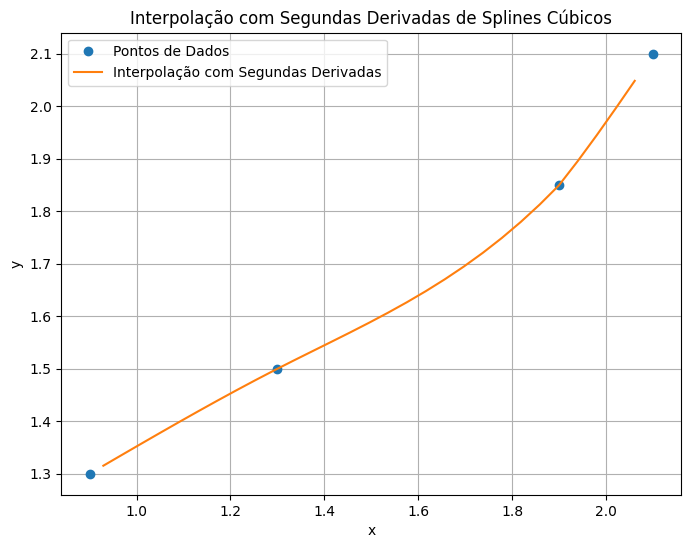

In [ ]:
x =  np.array([0.9,1.3,1.9,2.1], dtype = 'double')
y =  np.array([1.3,1.5,1.85,2.1], dtype = 'double')
s2 = SplineCubica (4, x, y)
print("S2: ", s2)
xi = np.linspace(0, 4, 100)
yi = [cubic_spline_interpolation(x, y, s2, x_val) for x_val in xi]

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Pontos de Dados')
plt.plot(xi, yi, label='Interpolação com Segundas Derivadas')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolação com Segundas Derivadas de Splines Cúbicos')
plt.legend()
plt.grid(True)
plt.show()

S2:  [ 0.          1.18920635 -0.06222222  0.        ]


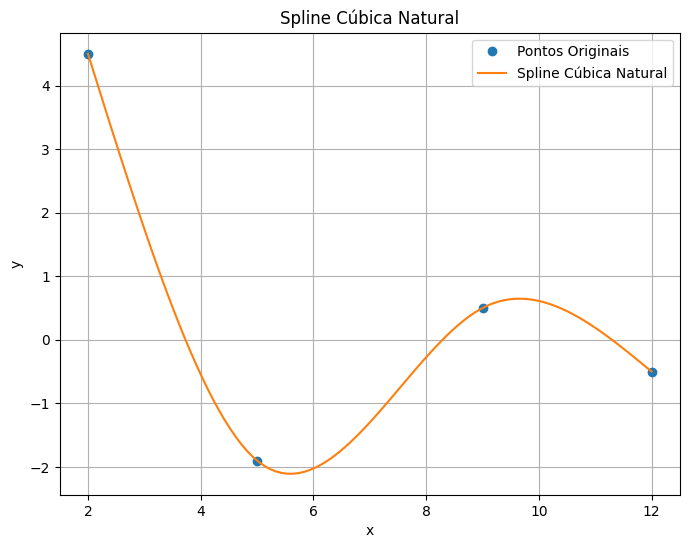

In [ ]:
#x =  np.array([0, 1, 4, 6], float)
#y =  np.array([1.0, 2.3, 2.2, 3.7], float)
x =  np.array([2, 5, 9, 12], float)
y =  np.array([4.5, -1.9, 0.5, -0.5], float)
u = 4
s2 = SplineCubica (u, x, y)
print("S2: ", s2)

spline = CubicSpline(x, y, bc_type='natural')
x_smooth = np.linspace(x[0], x[-1], 100)
y_smooth = spline(x_smooth)

# Plotando os pontos originais e a spline cúbica natural
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Pontos Originais')
plt.plot(x_smooth, y_smooth, '-', label='Spline Cúbica Natural')
plt.title('Spline Cúbica Natural')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
vetorAbscissas = np.array([3, 4.5, 7, 9], float)
vetorOrdenadas= np.array([2.5, 1, 2.5, 0.5], float)
vetor, info = SplineCubica(4, vetorAbscissas, vetorOrdenadas)
print("Vetor: ", vetor, "\nInfo: ", info)

Vetor:  [ 0.   0.  -9.6  0. ] 
Info:  0


<ipython-input-13-df6174b3b1cb>:31: RuntimeWarning: invalid value encountered in double_scalars
  s2[m+1]=s2[m+1]/d[m]


In [ ]:
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])

# Definindo o vetor de termos independentes
b = np.array([8, -11, -3])

# Resolvendo o sistema de equações lineares
solucao = np.linalg.solve(A, b)

print("A solução do sistema é:", solucao)



A solução do sistema é: [ 2.  3. -1.]


In [ ]:
def graf(f1, curva, titulo):
  valores = [f1(valor) for valor in curva]
  plt.plot(curva, valores, linestyle = '-')
  plt.title(titulo)
  plt.grid()
  plt.show()

###Aproximação Linear

 scipy Interpol

In [ ]:
def AproximaçãoLinear(x, y, n, a1, a0, syx):
  sumx = 0
  sumy = 0
  sumxy = 0
  sumx2 = 0
  st = 0
  sr = 0
  for i in range(0, n):
    sumx = sumx + x[i]
    sumy = sumy + y[i]
    sumxy = sumxy + x[i]*y[i]
    sumx2 = sumx2 + x[i]*x[i]
  xm = sumx/n
  ym = sumy/n
  a1 = (n*sumxy - sumx*sumy)/(n*sumx2 - sumx*sumx)
  a0 = ym - a1*xm
  for i in range(0, n):
    st =st + (y[i] - ym)*(y[i] - ym)
    sr = sr + (y[i] - a1*x[i] - a0)*(y[i] - a1*x[i] - a0)
  syx = (sr/(n-2))**0.5


In [ ]:
def minimosQuadrados(n, X, Y, grau):
    H = np.array([[x**i for x in X] for i in range(grau+1)])
    A = np.dot(H, H.T)
    b = np.dot(H, Y)
    x = np.linalg.solve(A, b)
    equacao = 'f(x) = ' , ' + '.join([f'{x[i]:.10f}x^{i}' for i in range(len(x))])
    return equacao;